In [1]:
##Importing necessary libraries
import pandas as pd
import fbprophet as fb
import yfinance as yf
# import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Some Ticker symbols for fetching Cryptocurrency Data from Yahoo Finance Library
# tickers_list = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'HEX-USD',
#  'XRP-USD',
#  'LUNA1-USD',
#  'SOL-USD',
#  'ADA-USD',
#  'UST-USD',
#  'BUSD-USD',
#  'DOGE-USD',
#  'AVAX-USD',
#  'DOT-USD',
#  'SHIB-USD',
#  'WBTC-USD',
#  'STETH-USD',
#  'DAI-USD',
#  'MATIC-USD']


In [19]:
#Loading The Crypto Data to memory & Viewing first 5 records
tickers_name = input('Enter a Ticker Symbol (e.g. BTC-USD): ')
df = yf.download(tickers_name, start='2022-01-01', end='2022-05-01', interval="1d", group_by='tickers')
df.head()



[*********************100%***********************]  0 of 0 completed


ValueError: No objects to concatenate

In [4]:
# Dropping Some Columns Based on Feature Importance
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis = 1, inplace = True)
df.head()

,Close
Date,
2022-01-01,3769.697021
2022-01-02,3829.564941
2022-01-03,3761.380371
2022-01-04,3794.056641
2022-01-05,3550.386963


In [5]:
# Creating a New "Date" Columns Accessible by Name Rather Than Index & Concatenating with Target Variable DataFrame
ds = pd.date_range(start='2022-01-01',end='2022-05-01').to_frame(name='Date')
ds.head()

,Date
2022-01-01,2022-01-01
2022-01-02,2022-01-02
2022-01-03,2022-01-03
2022-01-04,2022-01-04
2022-01-05,2022-01-05


In [6]:
df_ = pd.concat([ds,df],axis=1)
df_.head()

,Date,Close
2022-01-01,2022-01-01,3769.697021
2022-01-02,2022-01-02,3829.564941
2022-01-03,2022-01-03,3761.380371
2022-01-04,2022-01-04,3794.056641
2022-01-05,2022-01-05,3550.386963


In [7]:
# Renaming The Column Name To Suit The Requirement of The Machine Learning Model(i.e Facebook Prophet)
df_.columns=["ds","y"]
df_.head()

,ds,y
2022-01-01,2022-01-01,3769.697021
2022-01-02,2022-01-02,3829.564941
2022-01-03,2022-01-03,3761.380371
2022-01-04,2022-01-04,3794.056641
2022-01-05,2022-01-05,3550.386963


<AxesSubplot:>

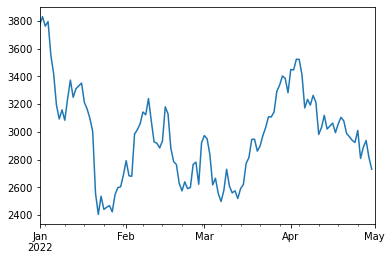

In [8]:
df_['y'].plot()

In [9]:
# Before Dropping Missing Rows
df_.isnull().sum()


ds    0
y     1
dtype: int64

In [10]:
# After Dropping Missing Rows
df_.dropna(inplace=True)
df_.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
### intiialize the Model
model_ = fb.Prophet()
model_.fit(df_)

#### Create future dates of 365 days
future_dates=model_.make_future_dataframe(periods=30)

### Prediction
prediction=model_.predict(future_dates)

prediction.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
145,2022-05-26,3223.016289,2862.122173,3544.506831,3178.425950,3271.876333,-20.748608,-20.748608,-20.748608,-20.748608,-20.748608,-20.748608,0.0,0.0,0.0,3202.267681
146,2022-05-27,3227.374244,2841.491827,3516.802617,3179.316406,3279.357936,-42.048368,-42.048368,-42.048368,-42.048368,-42.048368,-42.048368,0.0,0.0,0.0,3185.325876
147,2022-05-28,3231.732199,2856.809377,3532.565618,3181.402162,3287.136968,-19.206070,-19.206070,-19.206070,-19.206070,-19.206070,-19.206070,0.0,0.0,0.0,3212.526129
148,2022-05-29,3236.090154,2888.756151,3558.100799,3181.995767,3294.650313,-5.793256,-5.793256,-5.793256,-5.793256,-5.793256,-5.793256,0.0,0.0,0.0,3230.296899
149,2022-05-30,3240.448110,2911.529748,3601.162605,3183.980774,3301.187691,2.664236,2.664236,2.664236,2.664236,2.664236,2.664236,0.0,0.0,0.0,3243.112345


In [12]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
145,2022-05-26,3202.267681,2862.122173,3544.506831
146,2022-05-27,3185.325876,2841.491827,3516.802617
147,2022-05-28,3212.526129,2856.809377,3532.565618
148,2022-05-29,3230.296899,2888.756151,3558.100799
149,2022-05-30,3243.112345,2911.529748,3601.162605


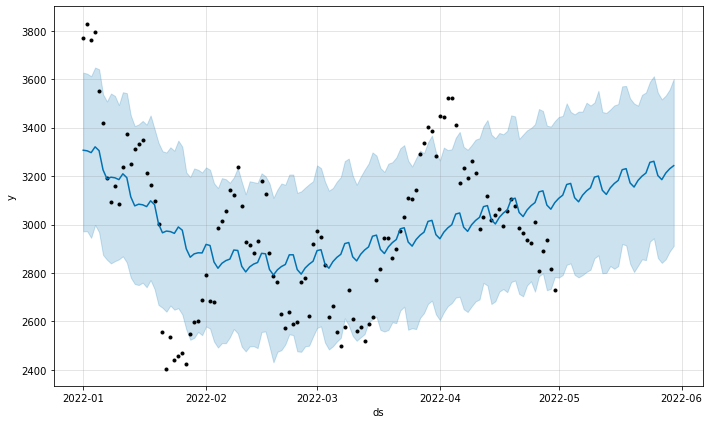

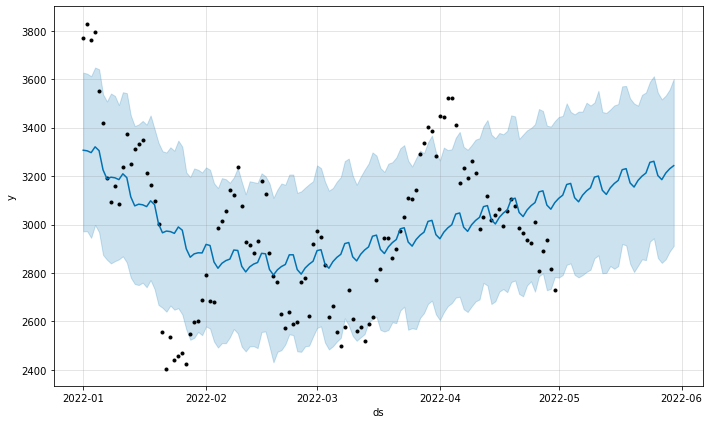

In [13]:
#### plot the predicted projection
model_.plot(prediction)

In [14]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model_, horizon="5 days")
df_cv.head()

INFO:fbprophet:Making 40 forecasts with cutoffs between 2022-01-17 12:00:00 and 2022-04-25 00:00:00


  0%|          | 0/40 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-18,3481.549501,3397.285192,3558.425435,3164.025146,2022-01-17 12:00:00
1,2022-01-19,3488.893121,3408.995626,3573.407233,3095.825928,2022-01-17 12:00:00
2,2022-01-20,3423.024162,3320.918063,3503.828135,3001.120117,2022-01-17 12:00:00
3,2022-01-21,3403.386952,3291.475227,3501.970755,2557.931641,2022-01-17 12:00:00
4,2022-01-22,3392.756393,3261.770200,3504.586106,2405.181152,2022-01-17 12:00:00


In [15]:
# Calculating the Performance Metrics
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 12:00:00,75310.371211,274.427351,252.981422,0.086482,0.089041,0.50
1,1 days 00:00:00,103288.213756,321.384837,268.974134,0.093558,0.081438,0.55
2,1 days 12:00:00,83138.088517,288.336762,267.152781,0.092659,0.096503,0.50
3,2 days 00:00:00,119984.021298,346.387097,293.979669,0.102636,0.090155,0.50
4,2 days 12:00:00,108937.805190,330.057276,281.446600,0.096851,0.094845,0.55


C:\Users\user\anaconda3\envs\COM725\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\user\anaconda3\envs\COM725\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


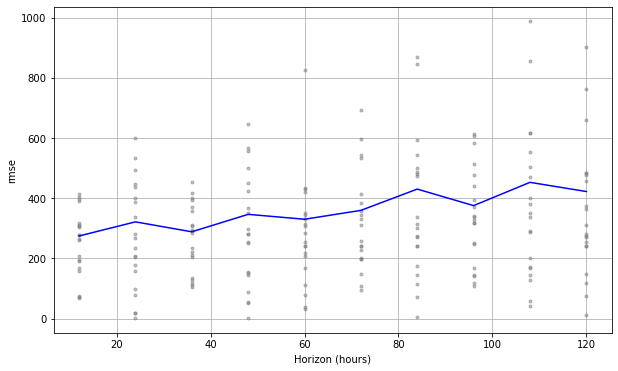

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')